In [32]:
import polars as pl
import networkx as nx
import community
import matplotlib.pyplot as plt
import leidenalg
import igraph as ig

import folium
import pandas as pd
import ipywidgets as widgets

In [33]:
df = pl.read_csv('../rtf/joined_data.csv')

In [34]:
G = nx.DiGraph()

for row in df.rows(named=True):
    G.add_edge(row['Buyer'], row['Seller'], weight=row['TIV delivery values'])

In [35]:
# Convert the graph to igraph
ig_graph = ig.Graph.TupleList(G.edges(), directed=True)

# Print the number of vertices and edges in the igraph
print("Number of vertices:", ig_graph.vcount())
print("Number of edges:", ig_graph.ecount())


Number of vertices: 264
Number of edges: 2973


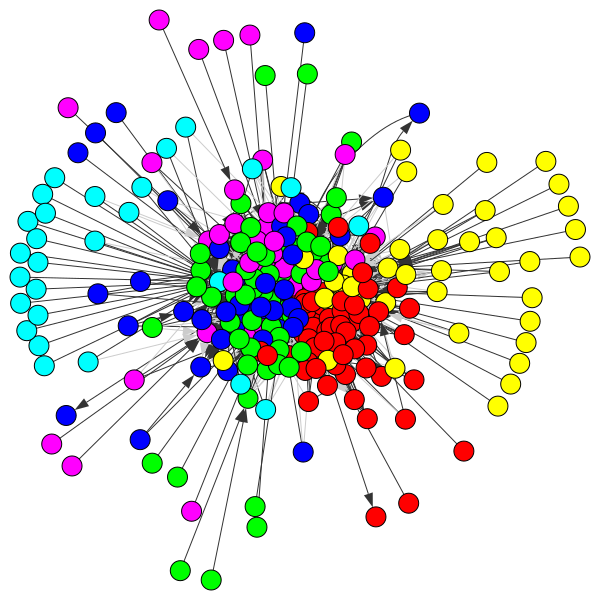

In [36]:
# Run the Leiden algorithm for community detection
partition = leidenalg.find_partition(ig_graph, leidenalg.VertexPartition.RBConfigurationVertexPartition, n_iterations=-1)

ig.plot(partition)

In [37]:

# create a dictionary to store the community members
community_members = {}
for vertex_name, community_id in zip(G.nodes(), partition.membership):
    if community_id in community_members:
        community_members[community_id].append(vertex_name)
    else:
        community_members[community_id] = [vertex_name]

# print the community members
for community_id, members in community_members.items():
    print(f"Community {community_id}: {members}")

Community 2: ['East Germany (GDR)', 'Soviet Union', 'Jordan', 'United Kingdom', 'Lebanon', 'Indonesia', 'Netherlands', 'North Korea', 'unknown supplier(s)', 'Chile', 'Mexico', 'Cuba', 'Yugoslavia', 'South Vietnam', 'Morocco', 'Libya', 'Indonesia rebels*', 'Niger', 'DR Congo', 'Somalia', 'Congo', 'Madagascar', 'Algeria', 'Rwanda', 'Zambia', 'Nepal', 'Guyana', 'Mauritius', 'Bhutan', 'Gambia', 'Malta', 'PAIGC (Portugal)*', 'FNLA (Angola)*', 'Fiji', 'Suriname', 'Barbados', 'SLA (Lebanon)*', 'UNITA (Angola)*', 'Samoa', 'Slovenia', 'Maldives', 'Georgia', 'North Macedonia', 'Tajikistan']
Community 0: ['Canada', 'India', 'United States', 'Greece', 'Israel', 'Hungary', 'Portugal', 'Pakistan', 'Saudi Arabia', 'Sri Lanka', 'Egypt', 'Sweden', 'Argentina', 'Venezuela', 'Iran', 'Poland', 'Australia', 'Spain', 'Myanmar', 'Guatemala', 'Luxembourg', 'Japan', 'Iraq', 'Finland', 'Ecuador', 'Austria', 'Laos', 'Armas (Guatemala)*', 'Tunisia', 'NATO**', 'Malaysia', 'Guinea', 'Nigeria', 'Liberia', 'unknown r

In [38]:
# set the initial center node
center_node = 'United States'

# find the neighbors of the center node
neighbors = ig_graph.neighbors(center_node, mode='out')

# create a subgraph with the center node and its neighbors
subgraph = ig_graph.subgraph([center_node] + neighbors)

# run the Leiden algorithm on the subgraph
partition = leidenalg.find_partition(subgraph, leidenalg.VertexPartition.RBConfigurationVertexPartition)

# print the communities
print(partition)

Clustering with 35 elements and 3 clusters
[0] Poland, Bulgaria, Jordan, Egypt, United States, Saudi Arabia, Brazil,
    Ukraine, Russia, unknown supplier(s), South Korea, Czechia, Chad,
    Mujahedin (Afghanistan)*, Peru
[1] Italy, France, Spain, Germany, South Africa, Canada, Netherlands, Austria,
    Israel, Switzerland, Sweden, Norway, Denmark
[2] United Kingdom, Australia, New Zealand, Japan, Singapore, Moldova, Taiwan


In [39]:
center_nodes = ['Soviet Union', 'United States', 'France']
partition = leidenalg.find_partition(ig_graph, leidenalg.VertexPartition.RBConfigurationVertexPartition)
print(partition)

Clustering with 264 elements and 6 clusters
[0] Italy, Finland, United Kingdom, France, Spain, Brazil, Belgium, Germany,
    Canada, Netherlands, Austria, Israel, Switzerland, Sweden, Norway, Japan,
    Denmark, Portugal, Greece, Uruguay, Argentina, Chile, Ecuador, Taiwan,
    Ireland, Bahamas, Aruba, Mexico, Colombia, Dominican Republic, Latvia,
    Iceland, Estonia, El Salvador, Haiti, Venezuela, Paraguay, Bolivia,
    Honduras, Guatemala, Luxembourg, Slovenia, Croatia, Panama, Tunisia,
    NATO**, Mauritania, United Nations**, Gabon, Jamaica, Malawi, Biafra,
    Suriname, Cabo Verde, Lesotho, Botswana, eSwatini, SLA (Lebanon)*, OSCE**
[1] Turkiye, Ukraine, Russia, South Africa, China, DR Congo, Kyrgyzstan,
    India, Ghana, Slovakia, Kazakhstan, Uzbekistan, Belarus, Uganda, Cote
    d'Ivoire, Serbia, Georgia, Sri Lanka, Montenegro, Zimbabwe, Mozambique,
    Kenya, Viet Minh (France)*, Afghanistan, Armenia, Zambia, unknown
    recipient(s), Niger, Eritrea, Senegal, Central African Re